# Load Data

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras

cifar10 = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


# Data Exploration

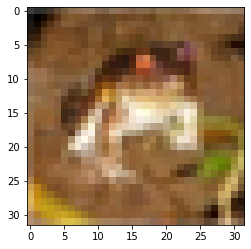

In [4]:
plt.imshow(x_train[0])

In [5]:
x_train[1].shape 

(32, 32, 3)

In [6]:
y_train[0] 

array([6], dtype=uint8)

In [7]:
print(len(np.unique(y_train)))

10


Label: [6]


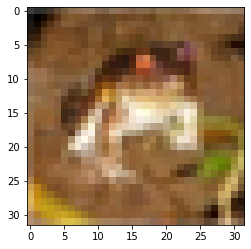

Label: [9]


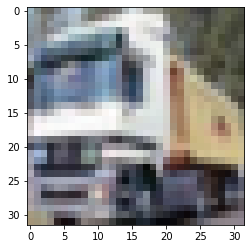

Label: [9]


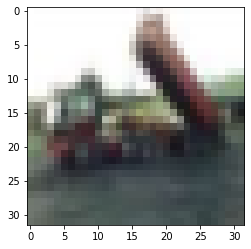

Label: [4]


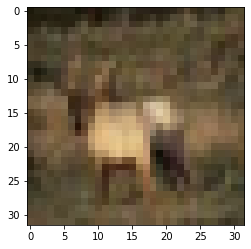

Label: [1]


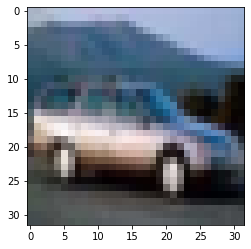

In [8]:
for i in range(5):
  print(f'Label: {y_train[i]}')
  plt.imshow(x_train[i], cmap='gray')
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


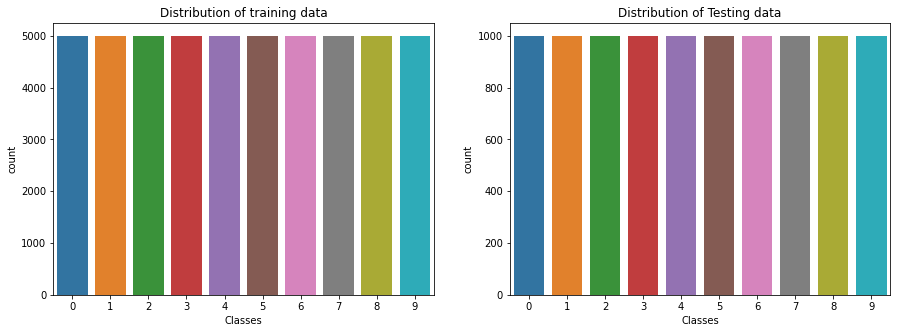

In [9]:
import seaborn as sns
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
# Count plot for training set
sns.countplot(y_train.ravel(), ax=axs[0])
axs[0].set_title('Distribution of training data')
axs[0].set_xlabel('Classes')
# Count plot for testing set
sns.countplot(y_test.ravel(), ax=axs[1])
axs[1].set_title('Distribution of Testing data')
axs[1].set_xlabel('Classes')
plt.show()

# Data Prerocessing

#### Normalization

In [10]:
x_train, x_test = x_train/255, x_test/255

#### Reshape the data

In [11]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [12]:
x_train[0].shape

(32, 32, 3, 1)

# Build The Model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))


In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 10)               

# Train the model

In [18]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [19]:
history = model.fit( x_train, y_train,epochs=30,batch_size= 64,validation_data=(x_test,y_test))

Epoch 1/30
782/782 [==============================] - 16s 6ms/step - loss: 1.5246 - accuracy: 0.4581 - val_loss: 1.2737 - val_accuracy: 0.5479
Epoch 2/30
782/782 [==============================] - 4s 6ms/step - loss: 1.1911 - accuracy: 0.5853 - val_loss: 1.1270 - val_accuracy: 0.6043
Epoch 3/30
782/782 [==============================] - 4s 5ms/step - loss: 1.0539 - accuracy: 0.6343 - val_loss: 1.0253 - val_accuracy: 0.6487
Epoch 4/30
782/782 [==============================] - 5s 7ms/step - loss: 0.9708 - accuracy: 0.6638 - val_loss: 1.0185 - val_accuracy: 0.6464
Epoch 5/30
782/782 [==============================] - 5s 6ms/step - loss: 0.9204 - accuracy: 0.6813 - val_loss: 0.9880 - val_accuracy: 0.6622
Epoch 6/30
782/782 [==============================] - 4s 6ms/step - loss: 0.8862 - accuracy: 0.6929 - val_loss: 0.9415 - val_accuracy: 0.6794
Epoch 7/30
782/782 [==============================] - 4s 5ms/step - loss: 0.8500 - accuracy: 0.7073 - val_loss: 0.9267 - val_accuracy: 0.6775
Epoch

# Evaluate the Model

#### Loss and Accuracy

In [20]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9406 - accuracy: 0.7051


[0.9405539035797119, 0.7050999999046326]

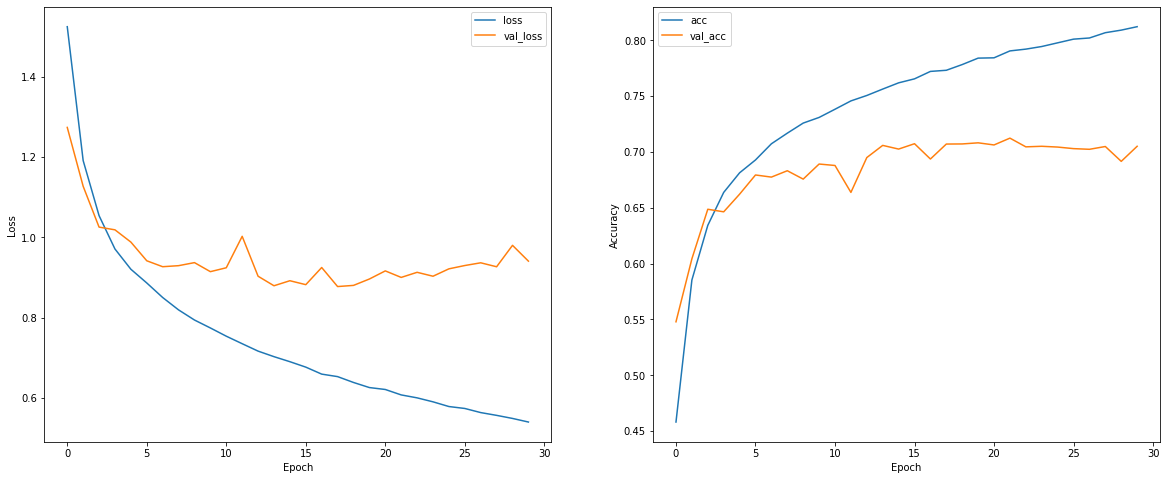

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### Performance Metrics

In [22]:
predictions_cnn = model.predict(x_test)

In [23]:
y_predict = np.argmax(predictions_cnn,axis=1)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1000
           1       0.83      0.82      0.82      1000
           2       0.55      0.62      0.58      1000
           3       0.57      0.46      0.50      1000
           4       0.73      0.57      0.64      1000
           5       0.57      0.69      0.63      1000
           6       0.77      0.80      0.78      1000
           7       0.75      0.74      0.75      1000
           8       0.79      0.82      0.81      1000
           9       0.79      0.79      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000



In [25]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


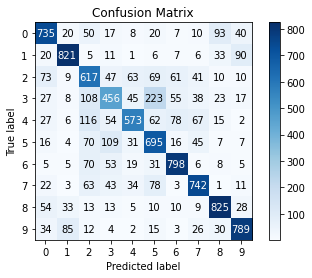

In [27]:
#Output Confusion Matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_predict)

# Add Dropout

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

In [30]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [31]:
history = model.fit( x_train, y_train,epochs=30,batch_size= 64,validation_data=(x_test,y_test))

Epoch 1/30
782/782 [==============================] - 5s 6ms/step - loss: 1.5840 - accuracy: 0.4310 - val_loss: 1.2888 - val_accuracy: 0.5470
Epoch 2/30
782/782 [==============================] - 4s 5ms/step - loss: 1.2277 - accuracy: 0.5702 - val_loss: 1.1260 - val_accuracy: 0.6047
Epoch 3/30
782/782 [==============================] - 4s 6ms/step - loss: 1.1060 - accuracy: 0.6135 - val_loss: 1.0405 - val_accuracy: 0.6395
Epoch 4/30
782/782 [==============================] - 5s 6ms/step - loss: 1.0359 - accuracy: 0.6391 - val_loss: 0.9828 - val_accuracy: 0.6678
Epoch 5/30
782/782 [==============================] - 5s 7ms/step - loss: 0.9879 - accuracy: 0.6571 - val_loss: 0.9691 - val_accuracy: 0.6679
Epoch 6/30
782/782 [==============================] - 4s 6ms/step - loss: 0.9560 - accuracy: 0.6666 - val_loss: 0.9085 - val_accuracy: 0.6850
Epoch 7/30
782/782 [==============================] - 5s 6ms/step - loss: 0.9257 - accuracy: 0.6764 - val_loss: 0.9088 - val_accuracy: 0.6905
Epoch 

# Evalaute the Model

#### Loss and Accuracy

In [32]:
model.evaluate(x_test,y_test) 

313/313 [==============================] - 1s 3ms/step - loss: 0.7755 - accuracy: 0.7364


[0.7755406498908997, 0.7364000082015991]

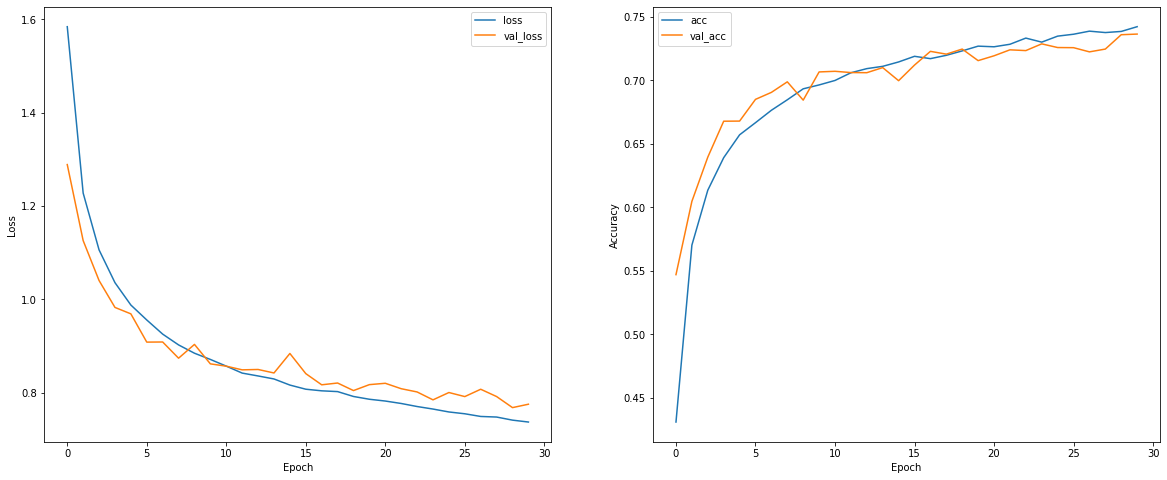

In [34]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch,loss,label='loss')
plt.plot(epoch,val_loss,label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epoch,acc,label='acc')
plt.plot(epoch,val_acc,label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

#### Performance Matrix

In [35]:
predictions_cnn = model.predict(x_test)

In [36]:
y_predict = np.argmax(predictions_cnn,axis=1)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1000
           1       0.88      0.85      0.86      1000
           2       0.66      0.55      0.60      1000
           3       0.63      0.46      0.53      1000
           4       0.61      0.79      0.69      1000
           5       0.64      0.71      0.67      1000
           6       0.75      0.84      0.79      1000
           7       0.79      0.77      0.78      1000
           8       0.82      0.84      0.83      1000
           9       0.82      0.82      0.82      1000

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.73     10000
weighted avg       0.74      0.74      0.73     10000



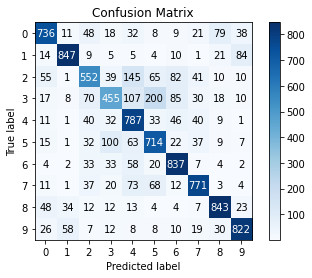

In [38]:
#Output Confusion Matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_predict)